In [1]:
import pandas as pd
import numpy as np
import datetime
#from datetime import datetime

In [2]:
df_raw = pd.read_csv('dados/bronze/raw_data.csv', index_col=0)

In [3]:
print(df_raw.shape)
pd.set_option("display.max_columns", 70)
df_raw.head(3)

(1317, 66)


,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,license,creator,title,alt_title,thumbnails,description,categories,tags,subtitles,automatic_captions,duration,age_limit,annotations,chapters,webpage_url,view_count,like_count,dislike_count,average_rating,formats,is_live,start_time,end_time,series,season_number,episode_number,track,artist,album,release_date,release_year,subscriber_count,extractor,webpage_url_basename,extractor_key,n_entries,playlist,playlist_id,playlist_title,playlist_uploader,playlist_uploader_id,playlist_index,thumbnail,display_id,requested_subtitles,requested_formats,format,format_id,ext,width,height,resolution,fps,vcodec,vbr,stretched_ratio,acodec,abr,query
0,kE9gYQDyVr0,Hashtag Programação,NaN,http://www.youtube.com/@HashtagProgramacao,UCafFexaRoRylOKdzGBU6Pgg,http://www.youtube.com/channel/UCafFexaRoRylOK...,20230417,NaN,NaN,Trabalhando com Bases de Dados (Datasets) Desb...,NaN,[{'url': 'https://i.ytimg.com/vi/kE9gYQDyVr0/h...,Quer saber mais sobre o nosso Curso Completo d...,['Education'],"['Bases de dados desbalanceadas', 'Datasets de...",{},{},1326.0,0,NaN,NaN,https://www.youtube.com/watch?v=kE9gYQDyVr0,858,72.0,NaN,NaN,"[{'format_id': '249', 'url': 'https://rr1---sn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,youtube,kE9gYQDyVr0,Youtube,232,ciencia+de+dados,ciencia+de+dados,NaN,NaN,NaN,1,https://i.ytimg.com/vi_webp/kE9gYQDyVr0/maxres...,kE9gYQDyVr0,NaN,"[{'format_id': '137', 'url': 'https://rr1---sn...",137 - 1920x1080 (1080p)+140 - audio only (tiny),137+140,mp4,1920,1080,NaN,30,avc1.640028,NaN,NaN,mp4a.40.2,128.0,ciencia+de+dados
1,GgEUPkAG1ho,Jonas Silva,NaN,http://www.youtube.com/@jonassilva1500,UC93r1MGydg0Wd9_spsG4W9Q,http://www.youtube.com/channel/UC93r1MGydg0Wd9...,20230413,NaN,NaN,Trabalho ciencia de dados-parte-1,NaN,[{'url': 'https://i.ytimg.com/vi/GgEUPkAG1ho/h...,NaN,['People & Blogs'],NaN,{},{},389.0,0,NaN,NaN,https://www.youtube.com/watch?v=GgEUPkAG1ho,2,NaN,NaN,NaN,"[{'format_id': '251', 'url': 'https://rr1---sn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,youtube,GgEUPkAG1ho,Youtube,232,ciencia+de+dados,ciencia+de+dados,NaN,NaN,NaN,2,https://i.ytimg.com/vi/GgEUPkAG1ho/maxresdefau...,GgEUPkAG1ho,NaN,"[{'format_id': '137', 'url': 'https://rr1---sn...",137 - 1920x1080 (1080p)+140 - audio only (tiny),137+140,mp4,1920,1080,NaN,25,avc1.640028,NaN,NaN,mp4a.40.2,128.0,ciencia+de+dados
2,U1a_Tp0O1Co,Hashtag Programação,NaN,http://www.youtube.com/@HashtagProgramacao,UCafFexaRoRylOKdzGBU6Pgg,http://www.youtube.com/channel/UCafFexaRoRylOK...,20230410,NaN,NaN,Como Aprender CIÊNCIA DE DADOS do ZERO?,NaN,[{'url': 'https://i.ytimg.com/vi/U1a_Tp0O1Co/h...,Quer saber mais sobre o nosso Curso Completo d...,['Education'],"['Como aprender ciência de dados', 'Como apren...",{},{},1514.0,0,NaN,NaN,https://www.youtube.com/watch?v=U1a_Tp0O1Co,1,173.0,NaN,NaN,"[{'format_id': '249', 'url': 'https://rr1---sn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,youtube,U1a_Tp0O1Co,Youtube,232,ciencia+de+dados,ciencia+de+dados,NaN,NaN,NaN,3,https://i.ytimg.com/vi_webp/U1a_Tp0O1Co/maxres...,U1a_Tp0O1Co,NaN,"[{'format_id': '137', 'url': 'https://rr1---sn...",137 - 1920x1080 (1080p)+140 - audio only (tiny),137+140,mp4,1920,1080,NaN,30,avc1.640028,NaN,NaN,mp4a.40.2,128.0,ciencia+de+dados


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1316
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1317 non-null   object 
 1   uploader              1316 non-null   object 
 2   uploader_id           0 non-null      float64
 3   uploader_url          1317 non-null   object 
 4   channel_id            1317 non-null   object 
 5   channel_url           1317 non-null   object 
 6   upload_date           1317 non-null   int64  
 7   license               0 non-null      float64
 8   creator               0 non-null      float64
 9   title                 1317 non-null   object 
 10  alt_title             0 non-null      float64
 11  thumbnails            1317 non-null   object 
 12  description           1207 non-null   object 
 13  categories            1317 non-null   object 
 14  tags                  938 non-null    object 
 15  subtitles            

# Tratamento dos dados

## Tratando valores ausentes

In [5]:
df1 = df_raw.copy()
df1[['uploader', 'tags', 'like_count']] = df1[['uploader', 'tags', 'like_count']].fillna('Sem valor')

In [6]:
def split(df, coluna, coluna_vazia, padrao):
    for numero, string in enumerate(df[coluna_vazia]):
        index = numero 
        if string == 'Sem valor':
            print(df[coluna][index])
            valor = df[coluna][index]
            print(valor)
            df[coluna_vazia][index] = valor.split(padrao)[1]

In [7]:
split(df1, 'uploader_url', 'uploader', '@')

http://www.youtube.com/@CavalcantiKarlinha
http://www.youtube.com/@CavalcantiKarlinha


/tmp/ipykernel_60664/1667779886.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna_vazia][index] = valor.split(padrao)[1]


In [8]:
df1['tags'] = df1['tags'].replace('Sem valor', '')
df1['like_count'] = df1['like_count'].replace('Sem valor', 0)

In [9]:
df1 = df1.dropna(axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1316
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1317 non-null   object 
 1   uploader              1317 non-null   object 
 2   uploader_url          1317 non-null   object 
 3   channel_id            1317 non-null   object 
 4   channel_url           1317 non-null   object 
 5   upload_date           1317 non-null   int64  
 6   title                 1317 non-null   object 
 7   thumbnails            1317 non-null   object 
 8   categories            1317 non-null   object 
 9   tags                  1317 non-null   object 
 10  subtitles             1317 non-null   object 
 11  automatic_captions    1317 non-null   object 
 12  duration              1317 non-null   float64
 13  age_limit             1317 non-null   int64  
 14  webpage_url           1317 non-null   object 
 15  view_count           

In [10]:
df2 = df1[['id', 'title', 'uploader', 'upload_date', 'categories', 'tags',
           'duration', 'webpage_url', 'view_count', 'like_count', 'query']]

## Ajuste de id

In [11]:
df3 = df2.copy()
df3['id'] = 'watch?v='+df3['id']

## Limpeza da data

In [12]:
df3['upload_date'] = df3['upload_date'].astype(str).apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))
df3['upload_date'] = pd.to_datetime(df3['upload_date'], format='%Y-%m-%d')
df3.head(2)

,id,title,uploader,upload_date,categories,tags,duration,webpage_url,view_count,like_count,query
0,watch?v=kE9gYQDyVr0,Trabalhando com Bases de Dados (Datasets) Desb...,Hashtag Programação,2023-04-17,['Education'],"['Bases de dados desbalanceadas', 'Datasets de...",1326.0,https://www.youtube.com/watch?v=kE9gYQDyVr0,858,72.0,ciencia+de+dados
1,watch?v=GgEUPkAG1ho,Trabalho ciencia de dados-parte-1,Jonas Silva,2023-04-13,['People & Blogs'],,389.0,https://www.youtube.com/watch?v=GgEUPkAG1ho,2,0.0,ciencia+de+dados


In [13]:
colunas = ['id', 'titulo', 'canal', 'data_upload', 'categoria', 'tags',
           'duracao_segundos', 'link', 'visualizacoes', 'quantidade_likes',
           'query']
df3.columns = colunas
df3.head(2)

,id,titulo,canal,data_upload,categoria,tags,duracao_segundos,link,visualizacoes,quantidade_likes,query
0,watch?v=kE9gYQDyVr0,Trabalhando com Bases de Dados (Datasets) Desb...,Hashtag Programação,2023-04-17,['Education'],"['Bases de dados desbalanceadas', 'Datasets de...",1326.0,https://www.youtube.com/watch?v=kE9gYQDyVr0,858,72.0,ciencia+de+dados
1,watch?v=GgEUPkAG1ho,Trabalho ciencia de dados-parte-1,Jonas Silva,2023-04-13,['People & Blogs'],,389.0,https://www.youtube.com/watch?v=GgEUPkAG1ho,2,0.0,ciencia+de+dados


In [20]:
# Salvando os dados tratados
df3.to_csv('dados/silver/dados_tratados.csv')

# Feature Engineering

In [14]:
df4 = df3.copy()

In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1316
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1317 non-null   object        
 1   titulo            1317 non-null   object        
 2   canal             1317 non-null   object        
 3   data_upload       1317 non-null   datetime64[ns]
 4   categoria         1317 non-null   object        
 5   tags              1317 non-null   object        
 6   duracao_segundos  1317 non-null   float64       
 7   link              1317 non-null   object        
 8   visualizacoes     1317 non-null   int64         
 9   quantidade_likes  1317 non-null   float64       
 10  query             1317 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 155.8+ KB


In [17]:
dia_posterior_atual = str(datetime.date.today() + datetime.timedelta(1)) # para evitar divisões por zero
df4['tempo_desde_pub'] = (pd.to_datetime(dia_posterior_atual) - df4['data_upload']) / np.timedelta64(1, 'D')
df4['visualizacoes_por_dia'] = df4['visualizacoes'] / df4['tempo_desde_pub']
df4.head(3)

,id,titulo,canal,data_upload,categoria,tags,duracao_segundos,link,visualizacoes,quantidade_likes,query,tempo_desde_pub,visualizacoes_por_dia
0,watch?v=kE9gYQDyVr0,Trabalhando com Bases de Dados (Datasets) Desb...,Hashtag Programação,2023-04-17,['Education'],"['Bases de dados desbalanceadas', 'Datasets de...",1326.0,https://www.youtube.com/watch?v=kE9gYQDyVr0,858,72.0,ciencia+de+dados,3.0,286.000000
1,watch?v=GgEUPkAG1ho,Trabalho ciencia de dados-parte-1,Jonas Silva,2023-04-13,['People & Blogs'],,389.0,https://www.youtube.com/watch?v=GgEUPkAG1ho,2,0.0,ciencia+de+dados,7.0,0.285714
2,watch?v=U1a_Tp0O1Co,Como Aprender CIÊNCIA DE DADOS do ZERO?,Hashtag Programação,2023-04-10,['Education'],"['Como aprender ciência de dados', 'Como apren...",1514.0,https://www.youtube.com/watch?v=U1a_Tp0O1Co,1,173.0,ciencia+de+dados,10.0,0.100000


<AxesSubplot:>

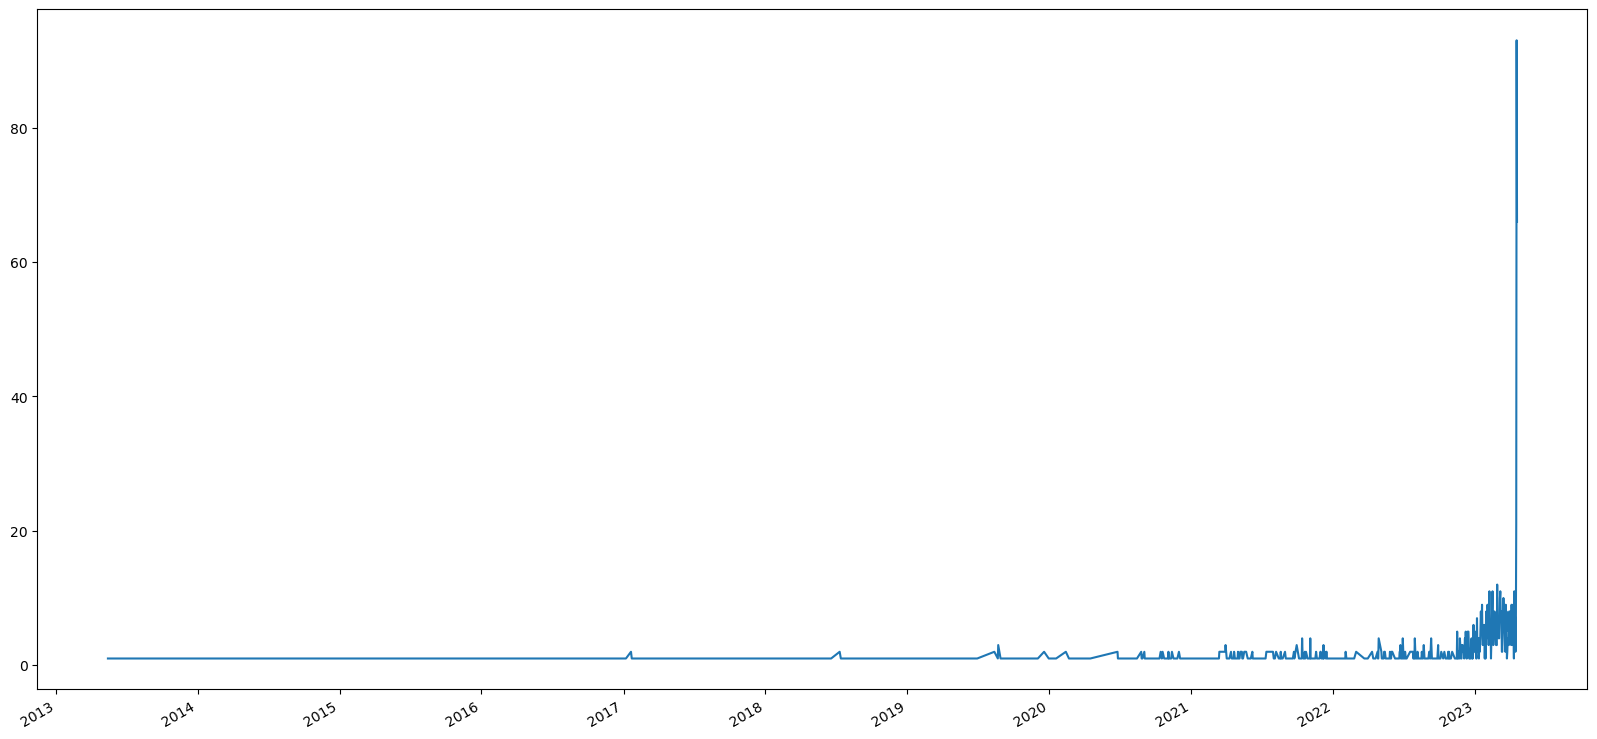

In [19]:
df4['data_upload'].value_counts().plot(figsize=(20, 10))

In [21]:
# Salvando os dados tratados
df4.to_csv('dados/silver/dados_tratados_com_features_novas.csv')

In [22]:
df4.shape

(1317, 13)